## ⚡️ Make a Copy

Save a copy of this notebook in your Google Drive before continuing. Be sure to edit your own copy, not the original notebook.

This lab adapts the tutorials provided in the [BERTopic code repository](https://github.com/MaartenGr/BERTopic) to the data used in this course.

## BERTopic
BERTopic is a topic modeling technique that leverages 🤗 transformers and a custom class-based TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions.

## Topic modeling the top reviews

In this lab, you will use BERTopic to build a topic model of the top reviews that you extracted from the Amazon product reviews data in Lab 1. Be sure that you have completed that lab, and that you have saved the MSDS_Lab1_TopReviews.jsonl file to your Google Drive.

For this lab, you will simply step through the code and create a topic model and related visualizations for your top reviews data. BERTopic is an excellent tool to have in your toolbox, so be sure to take the time to understand the steps along the way.

After completing this lab, be sure to submit images of your plots for peer assessment in Coursera.

# Enabling the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

[Reference](https://colab.research.google.com/notebooks/gpu.ipynb)

In [1]:
import json
import os
import pandas as pd
try:
  from bertopic import BERTopic
except:
  !pip install bertopic[all]
  os.kill(os.getpid(), 9)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
folder_path = "drive/MyDrive/MSDS_marketing_text_analytics"

Mounted at /content/drive


# **Prepare data**

Recall that in Lab 1 you created a data structure of top Nike reviews and then saved those reviews to a .jsonl file.

Run the following code to load the texts of the top reviews into a list:

In [3]:
texts = []
with open(f"{folder_path}/MSDS_Lab1_TopReviews.jsonl") as top_reviews_file:
    for review in top_reviews_file:
        data = json.loads(review)
        texts.append(data["reviewText"])

In [4]:
texts[0]

"I've had this watch for over a year now and wear it daily. I love it and the features it provides."

In [5]:
len(texts)

3549

# **Topic Modeling**

In this example, we will go through the main components of BERTopic and the steps necessary to create a strong topic model.




## Training

We start by instantiating BERTopic. We set language to `english` since our documents are in the English language. If you would like to use a multi-lingual model, please use `language="multilingual"` instead.

We will also calculate the topic probabilities. However, this can slow down BERTopic significantly at large amounts of data (>100_000 documents). It is advised to turn this off if you want to speed up the model.


In [6]:
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(texts)

2024-06-19 20:16:19,965 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/111 [00:00<?, ?it/s]

2024-06-19 20:16:32,711 - BERTopic - Embedding - Completed ✓
2024-06-19 20:16:32,712 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-19 20:16:53,951 - BERTopic - Dimensionality - Completed ✓
2024-06-19 20:16:53,954 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-19 20:16:54,542 - BERTopic - Cluster - Completed ✓
2024-06-19 20:16:54,553 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-19 20:16:54,721 - BERTopic - Representation - Completed ✓


**NOTE**: Use `language="multilingual"` to select a model that support 50+ languages.

## Extracting Topics
After fitting our model, we can start by looking at the results. Typically, we look at the most frequent topics first as they best represent the collection of documents.

In [7]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,1211,-1_the_and_to_shoes,"[the, and, to, shoes, my, is, for, they, of, it]",[I am a beginner runner and I run usually 3 to...
1,0,328,0_running_shoes_for_and,"[running, shoes, for, and, are, these, run, th...",[These are like walking on air! I have 5 pairs...
2,1,191,1_he_them_comfortable_they,"[he, them, comfortable, they, very, and, fit, ...","[Bought these for my grandson, 15, for school...."
3,2,121,2_size_11_small_10,"[size, 11, small, 10, but, 105, wear, 12, in, ...",[I normally wear size 9 but I had to get these...
4,3,101,3_sandals_these_are_and,"[sandals, these, are, and, comfortable, they, ...",[They are extremely comfortable and fit perfec...


-1 refers to all outliers and should typically be ignored. Next, let's take a look at a frequent topic that were generated:

In [8]:
topic_model.get_topic(0)  # Select the most frequent topic

[('running', 0.033311412997151936),
 ('shoes', 0.019492079128870934),
 ('for', 0.018850709617893147),
 ('and', 0.017662038884374252),
 ('are', 0.01649228110518275),
 ('these', 0.015901296687101805),
 ('run', 0.013934955068907682),
 ('the', 0.013880952140784218),
 ('shoe', 0.013635314328599933),
 ('to', 0.013624126536382288)]

**NOTE**: BERTopic is stocastich which mmeans that the topics might differ across runs. This is mostly due to the stocastisch nature of UMAP.

# **Visualization**
There are several visualization options available in BERTopic, namely the visualization of topics, probabilities and topics over time. Topic modeling is, to a certain extent, quite subjective. Visualizations help understand the topics that were created.

## Visualize Topics
After having trained our `BERTopic` model, we can iteratively go through perhaps a hundred topic to get a good
understanding of the topics that were extract. However, that takes quite some time and lacks a global representation.
Instead, we can visualize the topics that were generated in a way very similar to
[LDAvis](https://github.com/cpsievert/LDAvis):

In [9]:
topic_model.visualize_topics()

## Visualize Topic Hierarchy

The topics that were created can be hierarchically reduced. In order to understand the potential hierarchical structure of the topics, we can use scipy.cluster.hierarchy to create clusters and visualize how they relate to one another. This might help selecting an appropriate nr_topics when reducing the number of topics that you have created.

In [10]:
topic_model.visualize_hierarchy(top_n_topics=50)

## Visualize Terms

We can visualize the selected terms for a few topics by creating bar charts out of the c-TF-IDF scores for each topic representation. Insights can be gained from the relative c-TF-IDF scores between and within topics. Moreover, you can easily compare topic representations to each other.

In [11]:
topic_model.visualize_barchart(top_n_topics=5)

## Visualize Topic Similarity
Having generated topic embeddings, through both c-TF-IDF and embeddings, we can create a similarity matrix by simply applying cosine similarities through those topic embeddings. The result will be a matrix indicating how similar certain topics are to each other.

In [12]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

## Submit plots for peer review

To demonstrate completion of the lab, submit image snapshots of your plots to the peer review assessment for this lab in Coursera.

You should submit images of the following plots for review:

 * Hierarchical Clustering
 * Topic Word Scores
 * Similarity Matrix

To download each image for submission, use the "Download the plot as a png" in the upper right corner of each plot:


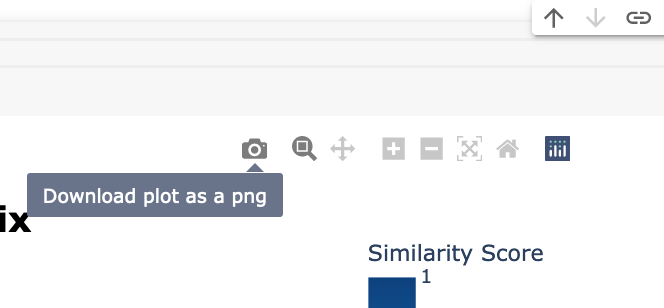


## Doing more

See the [original tutorial](https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing) from the BERTopic team to go into more depth with things you can do to explore, improve, and make use of your topic model, including:

 * Explore term score decline
 * Update topics for improved topic word representation
 * Topic reduction
 * Topic searching
 * Saving and embedding topic models